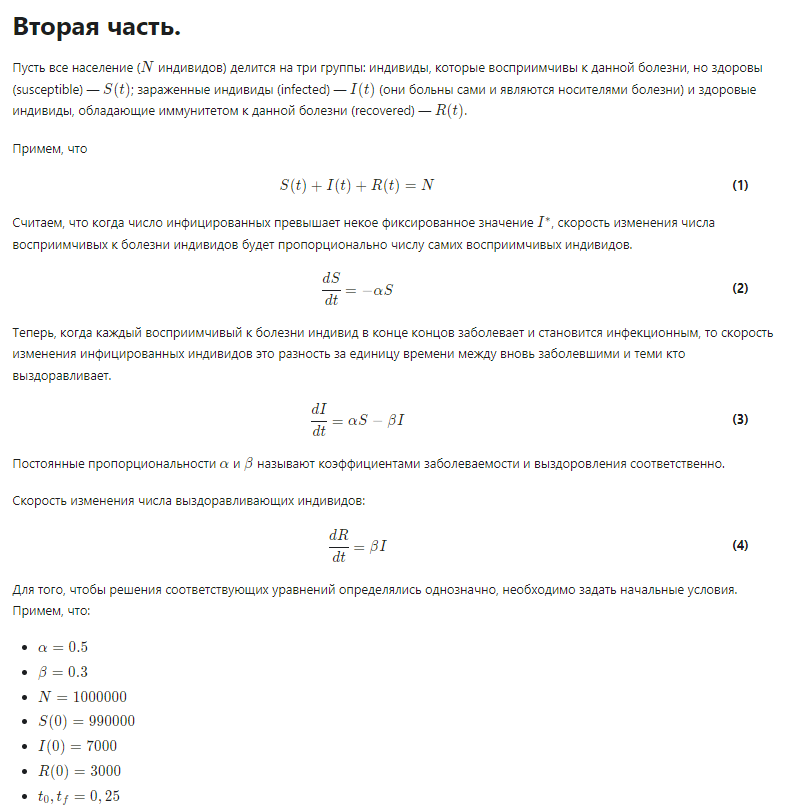

1....Решить дифференциальное уравнение (2) и построить график функции S(t)

[9.90000000e+05 9.34741505e+05 5.26338915e+05 2.14449863e+05
 8.92016780e+04 3.70563463e+04 1.53952532e+04 6.39600686e+03
 2.65724217e+03 1.10395999e+03 4.58643792e+02 1.90545047e+02
 7.91625391e+01 3.28883086e+01 1.36635268e+01 5.67652784e+00
 3.71298656e+00]


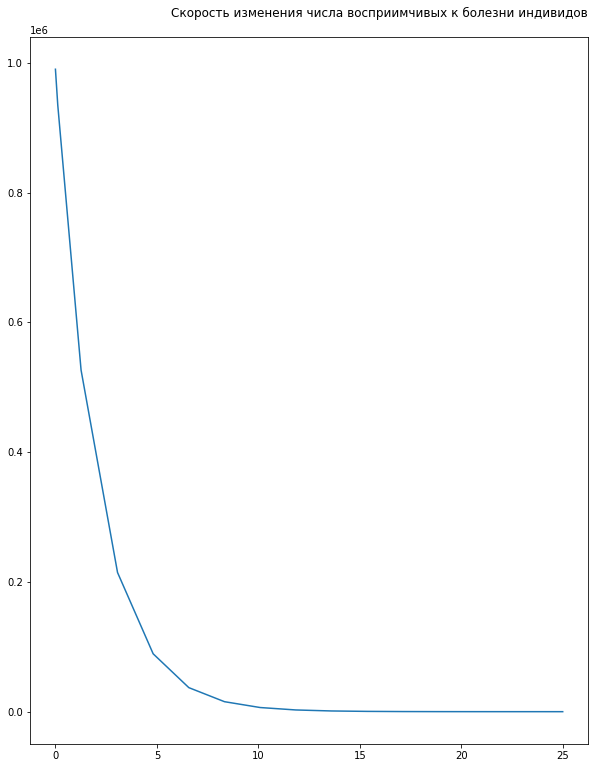

In [53]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

alpha = 0.5
betta = 0.3
n = 1000000
s0 = 990000
i0=7000
r0=3000
t0, tf = 0, 25


def dsdt(t, s):
    return -alpha * s


soln_s_from_t = solve_ivp(dsdt, (t0, tf), [s0])
#print(soln.t)
print(soln_s_from_t.y[0])

plt.plot(soln_s_from_t.t, soln_s_from_t.y[0]);
plt.title("Скорость изменения числа восприимчивых к болезни индивидов", loc="right", pad=20);

2....Решить дифференциальное уравнение (3) и построить график функции I(t)

[7.00000000e+03 6.60928335e+03 3.72158822e+03 1.51631210e+03
 6.30718880e+02 2.62014517e+02 1.08855275e+02 4.52242404e+01
 1.87885308e+01 7.80572763e+00 3.24288584e+00 1.34723816e+00
 5.59685087e-01 2.32493570e-01 9.65607925e-02 4.00871136e-02
 2.62535687e-02]


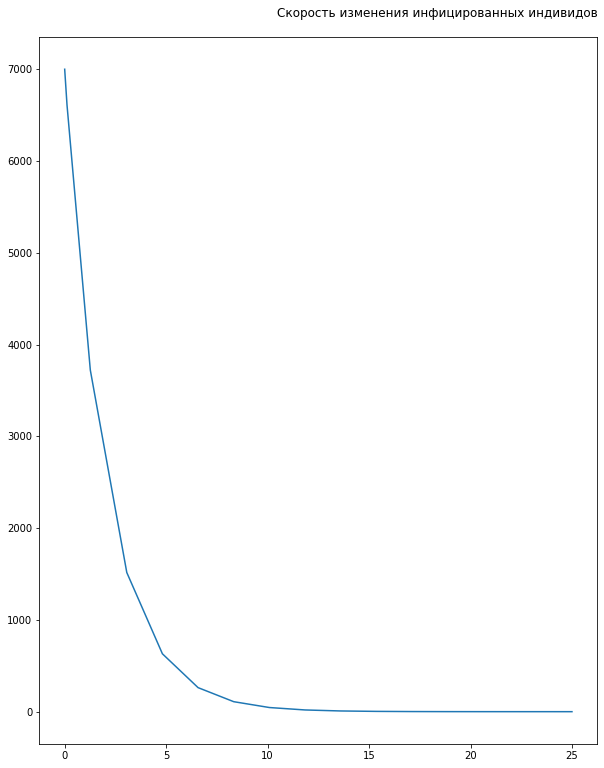

In [54]:
def didt(t, i):
    return alpha * soln_s_from_t - betta*i


soln_i_from_t = solve_ivp(dsdt, (t0, tf), [i0])
#print(soln.t)
print(soln_i_from_t.y[0])

plt.plot(soln_i_from_t.t, soln_i_from_t.y[0]);
plt.title("Скорость изменения инфицированных индивидов", loc="right", pad=20);

3...Используя решения уравнений (2) и (3), с помощью уравнения (1), найти решение уравнения (4) (используйте интерполяцию interp1d) и построить график функции R(t)

3000.0


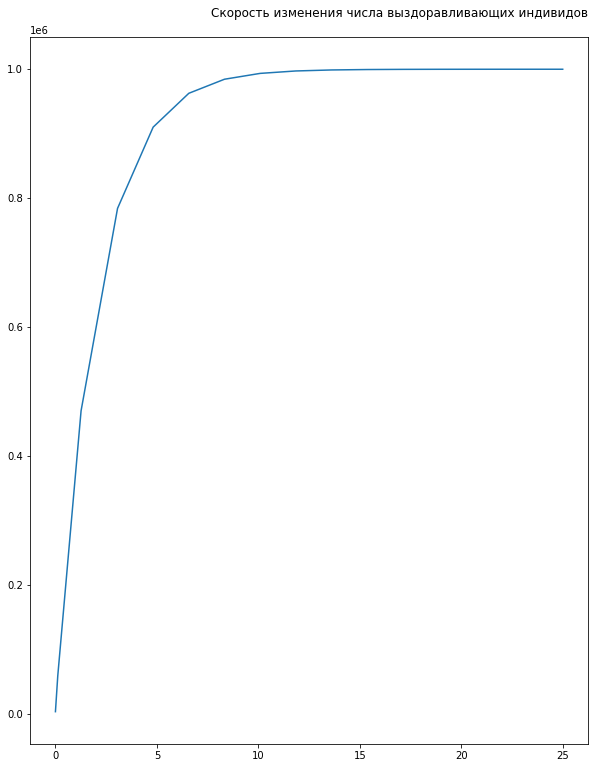

In [55]:
from scipy.interpolate import interp1d

t_values = soln_s_from_t.t
y_values = []

for num in range(0, len(t_values)):
  global n
  y_values.append(n - soln_s_from_t.y[0][num] - soln_i_from_t.y[0][num])

#print(t_values)
#print(y_values)
soln_r_from_t_inter = interp1d(t_values, y_values, kind='cubic')
print(soln_r_from_t_inter(0))
#soln_r_from_t_ = n - soln_s_from_t.y[0] - soln_i_from_t.y[0]
plt.plot(t_values, soln_r_from_t_inter(t_values));
plt.title("Скорость изменения числа выздоравливающих индивидов", loc="right", pad=20);

4....Построить все три графика S(t)S(t), I(t)I(t) и R(t)R(t) на одной области отображения

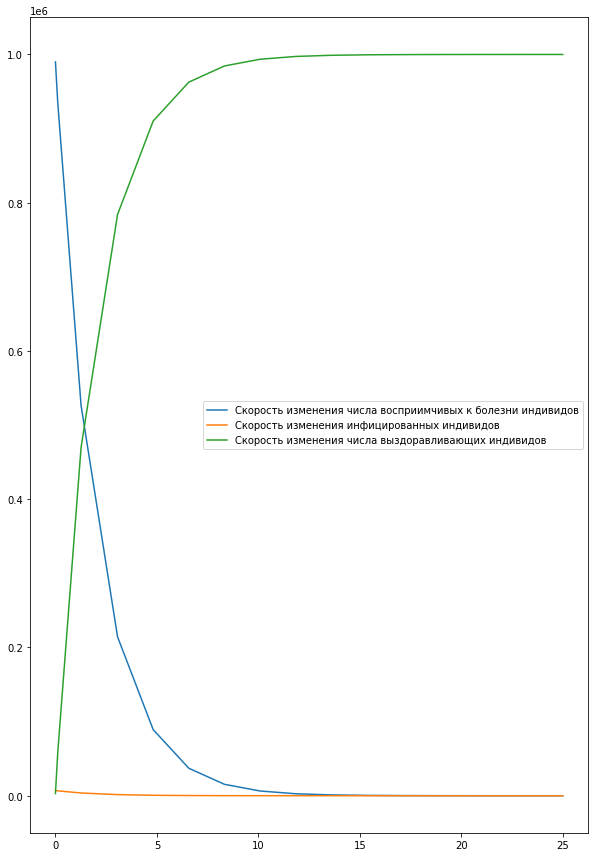

In [37]:
plt.plot(soln_s_from_t.t, soln_s_from_t.y[0], label="Скорость изменения числа восприимчивых к болезни индивидов")
plt.plot(soln_i_from_t.t, soln_i_from_t.y[0], label="Скорость изменения инфицированных индивидов")
plt.plot(t_values, soln_r_from_t_inter(t_values), label="Скорость изменения числа выздоравливающих индивидов")
plt.rcParams["figure.figsize"] = [10, 13]
plt.legend();